In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df=pd.read_csv('/content/50_Startups.csv')

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.shape

(50, 5)

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


EDA AND visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df[df.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
df=df.rename({'R&D Spend':'RnDSpend','Marketing Spend':'MarketingSpend'},axis=1)

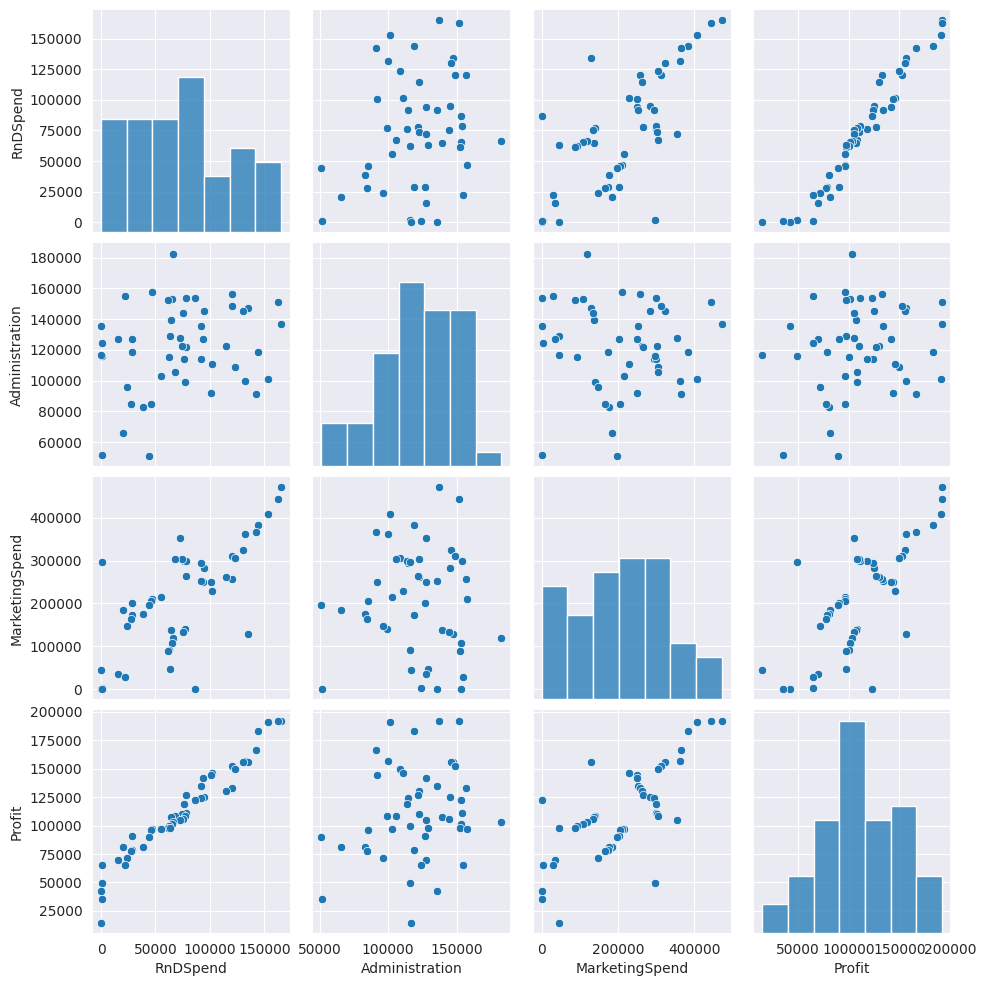

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [11]:
#model building
model1 = smf.ols('Profit~RnDSpend+Administration+MarketingSpend',data=df).fit()

In [12]:
model1.params

Intercept         50122.192990
RnDSpend              0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

In [13]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           4.53e-30
Time:                        17:57:58   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnDSpend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# the administration is insignificant and hence ,
#individual linear regression models is created for Administration and M

In [15]:
ml_a=smf.ols('Profit~Administration',data=df).fit()

In [16]:
ml_a.summary()
# Administartion is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 09 Nov 2023   Prob (F-statistic):              0.162
Time:                        17:57:58   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
ml_m=smf.ols('Profit~MarketingSpend',data=df).fit()

In [18]:
ml_m.summary()
# marketing spend has significant value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           4.38e-10
Time:                        17:57:58   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketingSpend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
ml_am=smf.ols('Profit~Administration+MarketingSpend',data=df).fit()

In [20]:
ml_am.summary()
# both Administration and Markting spend has significant values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.50e-10
Time:                        17:57:58   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
MarketingSpend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model Validation Techniques


In [21]:
rsq_Administration=smf.ols('Administration~RnDSpend+MarketingSpend',data=df).fit().rsquared
vif_Administration=1/(1-rsq_Administration)

rsq_RnDSpend=smf.ols('RnDSpend~Administration+MarketingSpend',data=df).fit().rsquared
vif_RnDSpend=1/(1-rsq_RnDSpend)

rsq_MarketingSpend=smf.ols('MarketingSpend~Administration+RnDSpend',data=df).fit().rsquared
vif_MarketingSpend=1/(1-rsq_MarketingSpend)

# Storing vif values in a data frame
d1={'Variables':['Adminstration','RnDSpend','MarketingSpend'],'VIF':[vif_Administration,vif_RnDSpend,vif_MarketingSpend]}
vif_frame=pd.DataFrame(d1)
vif_frame


,Variables,VIF
0,Adminstration,1.175091
1,RnDSpend,2.468903
2,MarketingSpend,2.326773


In [22]:
# all the VIF values are less than 20 and hence all the variables are taken into consideration

 Residual analysis

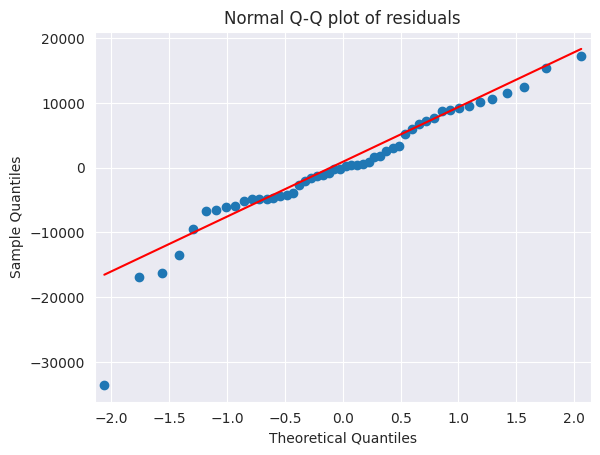

In [23]:
#Test for Normality of Residuals (Q-Q Plot)
qqplot=sm.qqplot(model1.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [24]:
list(np.where(model1.resid<-20000))

[array([49])]

In [25]:
#Residual Plot for Homoscedasticity or hetroscedasticity
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()

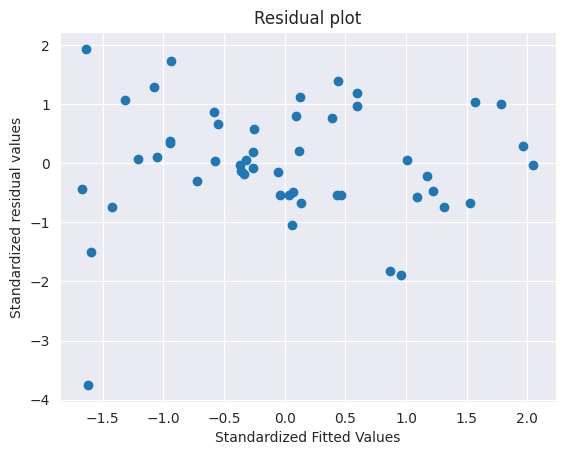

In [26]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))
plt.title('Residual plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual values')
plt.show()

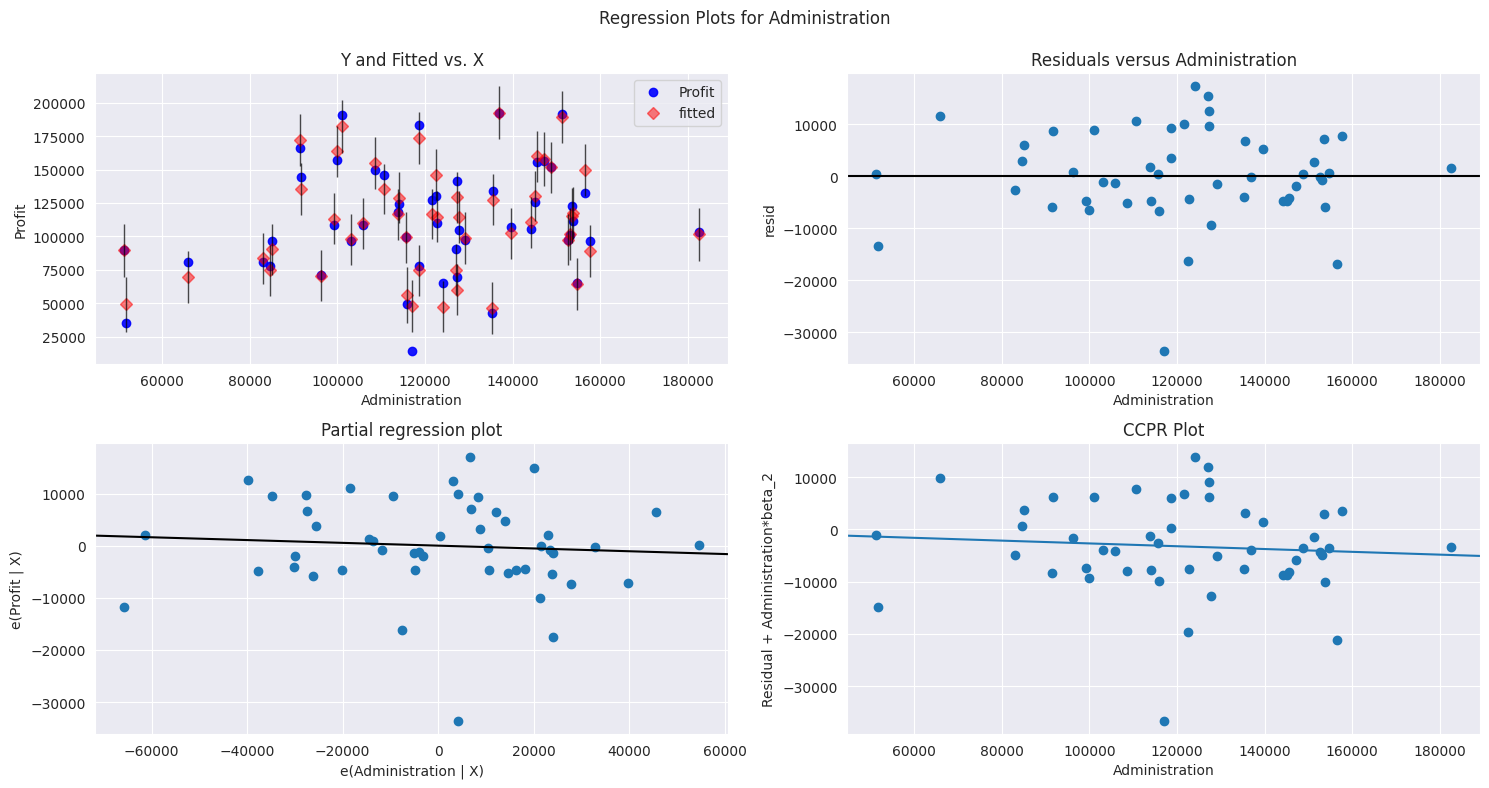

In [27]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,'Administration',fig=fig)
plt.show()

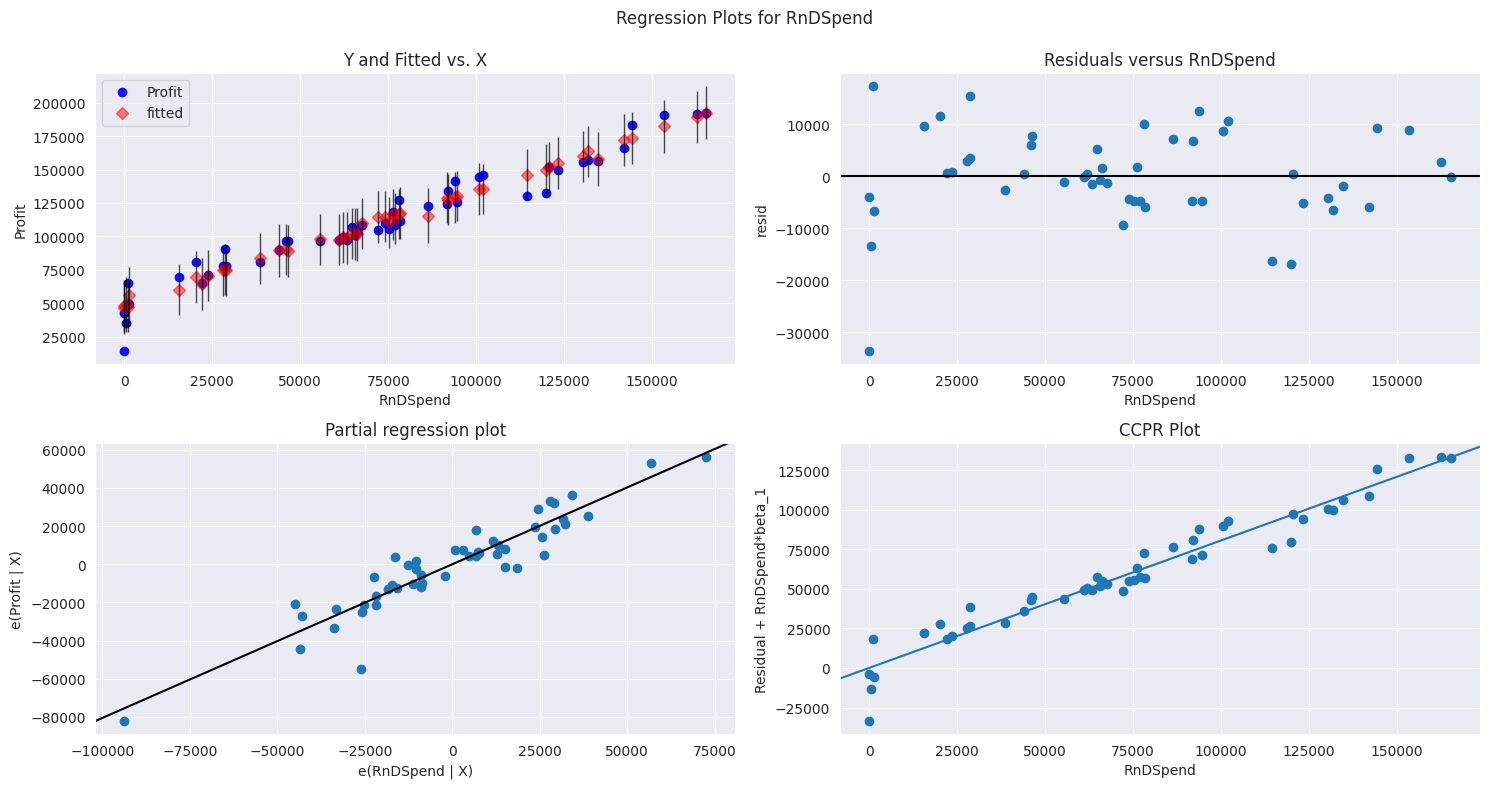

In [28]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,'RnDSpend',fig=fig)
plt.show()

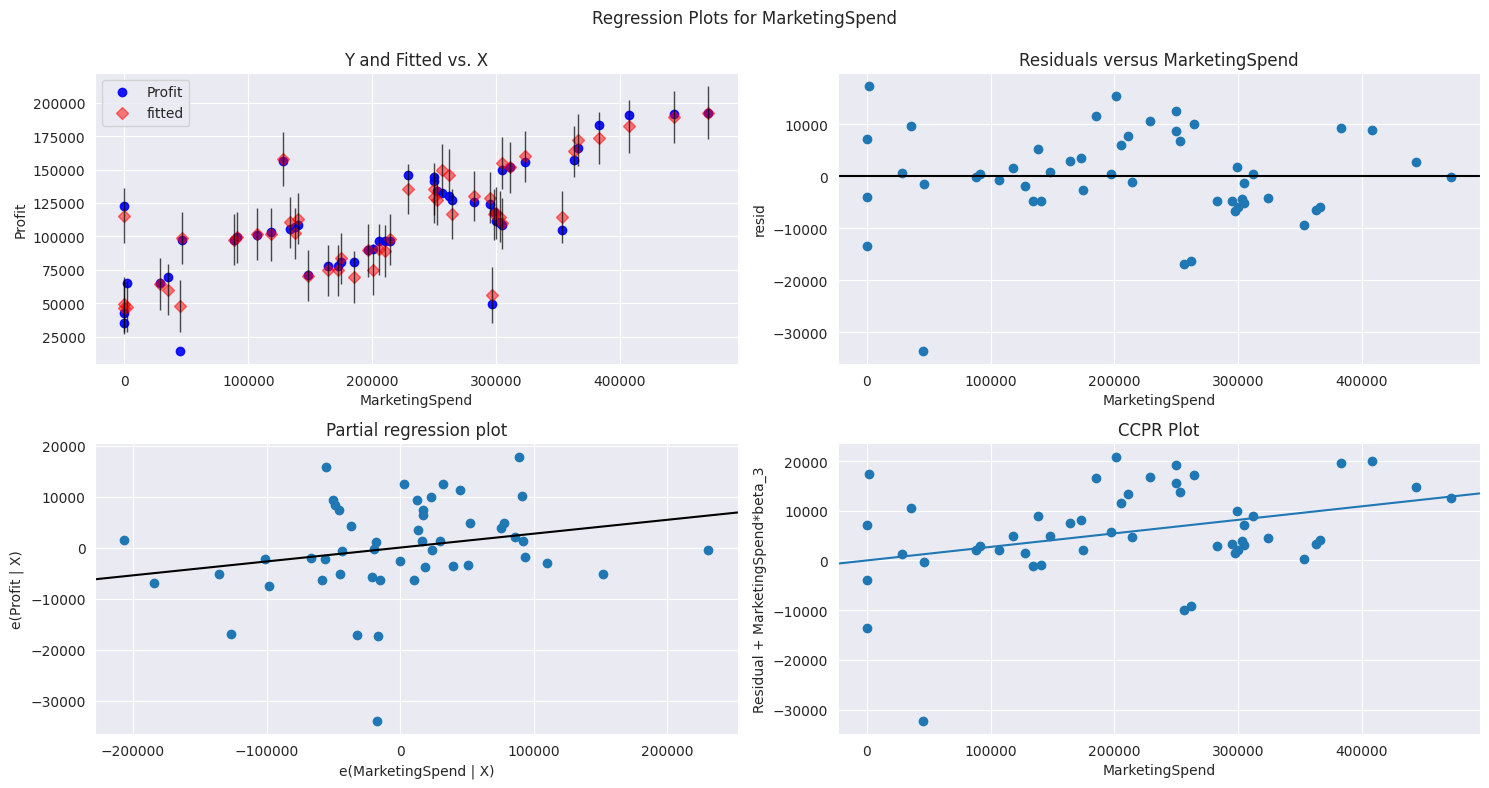

In [29]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,'MarketingSpend',fig=fig)
plt.show()

detection of outliers

In [30]:
model_influence=model1.get_influence()
(c,_)=model_influence.cooks_distance

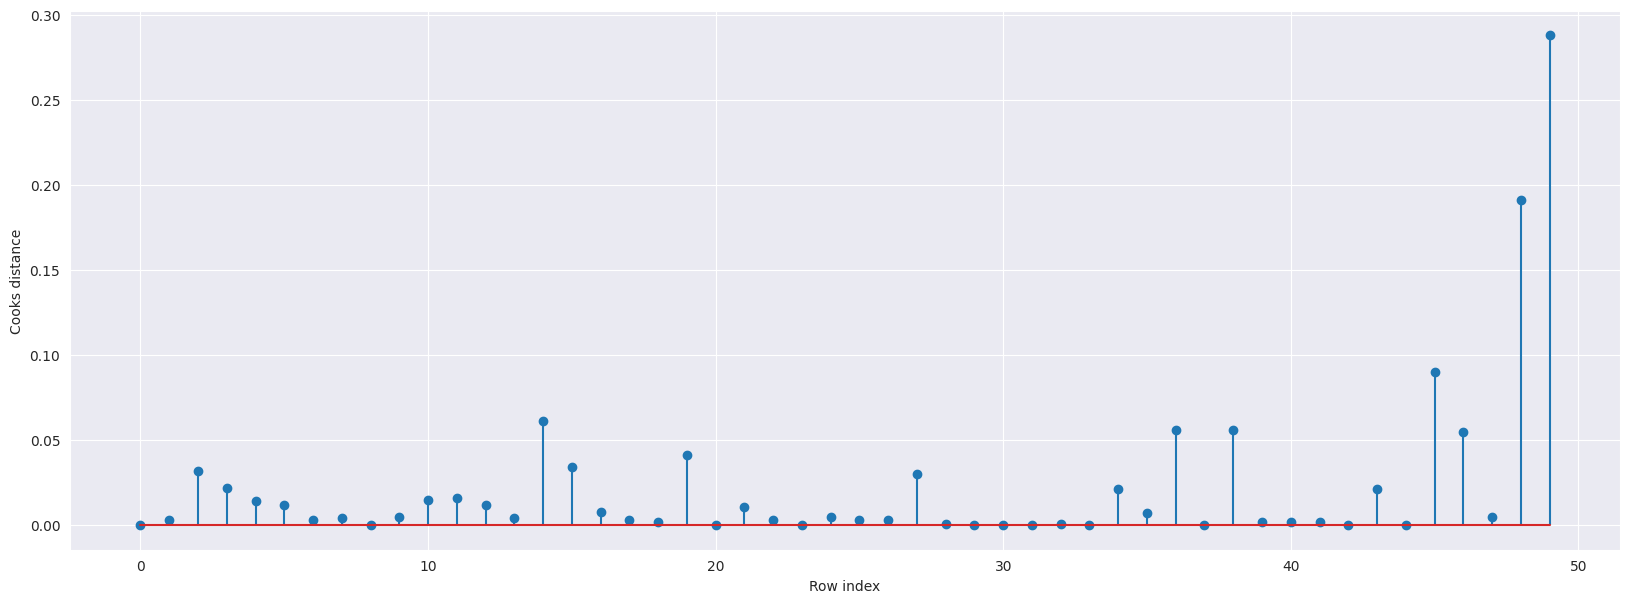

In [31]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [32]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

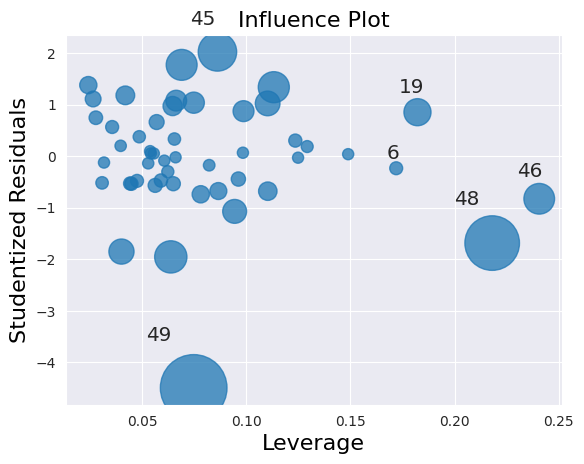

In [33]:
influence_plot(model1)
plt.show()

In [34]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.36

In [35]:
df[df.index.isin([49])]

,RnDSpend,Administration,MarketingSpend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [37]:
df_new=df.copy()

In [43]:
df1=df_new.drop(df_new.index[[49]],axis=0).reset_index()

In [44]:
df1=df1.drop(['index'],axis=1)

In [45]:
model2=smf.ols('Profit~RnDSpend+Administration+MarketingSpend',data=df1).fit()

In [46]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           8.85e-32
Time:                        18:14:21   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnDSpend           0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
MarketingSpend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
(model2.rsquared,model2.aic)

(0.9613162435129847, 1020.5652974526367)

model prediction

In [48]:
new_data=pd.DataFrame({'RnDSpend':100000,'Administration':150000,'MarketingSpend':400000},index=[1])
new_data

,RnDSpend,Administration,MarketingSpend
1,100000,150000,400000


In [49]:
model2.predict(new_data)

1    137445.871357
dtype: float64

In [50]:
model2.predict(df1.iloc[0:5,])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
4    170863.486721
dtype: float64